In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image

In [6]:

data_folder = 'data'
infected_folder = os.path.join(data_folder, 'train/infected')
notinfected_folder = os.path.join(data_folder, 'train/notinfected')

images = []  
labels = []


for filename in os.listdir(infected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(infected_folder, filename))
        img = img.resize((224, 224)) 
        img = np.array(img)
        if len(img.shape) == 3:  
            images.append(img / 255.0)  
            labels.append(1)  

for filename in os.listdir(notinfected_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(notinfected_folder, filename))
        img = img.resize((224, 224)) 
        img = np.array(img)
        if len(img.shape) == 3:  
            images.append(img / 255.0)  
            labels.append(0) 

images = np.array(images)
labels = np.array(labels)

x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
x_train, y_train = shuffle(x_train, y_train, random_state=42)  
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)




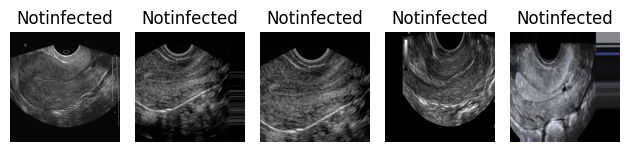

In [7]:

notinfected_indices = [i for i, label in enumerate(labels) if label == 0]

for i in range(5):
    plt.subplot(3, 5, i + 1)  
    plt.imshow(images[notinfected_indices[i]])
    plt.title("Notinfected")
    plt.axis('off')

plt.tight_layout()  
plt.show()

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Dropout(0.6))  

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(0.6)) 

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2))

In [3]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [10]:
history = model.fit(
    x_train,  
    y_train,  
    epochs=50,  
    batch_size=32,  
    validation_data=(x_val, y_val),  
    callbacks=[early_stopping] 
)

Epoch 1/50
40/40 [==============================] - 60s 1s/step - loss: 0.6284 - accuracy: 0.7886 - val_loss: 0.2055 - val_accuracy: 0.9010
Epoch 2/50
40/40 [==============================] - 45s 1s/step - loss: 0.1022 - accuracy: 0.9616 - val_loss: 0.0436 - val_accuracy: 0.9840
Epoch 3/50
40/40 [==============================] - 25s 637ms/step - loss: 0.0222 - accuracy: 0.9920 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 4/50
40/40 [==============================] - 25s 636ms/step - loss: 0.0174 - accuracy: 0.9920 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/50
40/40 [==============================] - 25s 635ms/step - loss: 0.0072 - accuracy: 0.9968 - val_loss: 0.0161 - val_accuracy: 0.9968
Epoch 6/50
40/40 [==============================] - 25s 636ms/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 7/50
40/40 [==============================] - 25s 636ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0119 - val_accuracy: 0.9936
Epoch

In [2]:


test_image = Image.open('data/test/img7.jpg')  
test_image = test_image.resize((224, 224))  
test_image = np.array(test_image) / 255.0 


predictions = model.predict(np.expand_dims(test_image, axis=0))  

predicted_class = np.argmax(predictions, axis=1)

if predicted_class == 0:
    predict = "Notifected"
   
else:
   predict = "Infected"

plt.imshow(test_image)
plt.title( predict)
plt.axis('off')  
plt.show()


NameError: name 'model' is not defined